# 1. Setting up and get the data

## Download dependencies

In [ ]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib albumentations

## Collect images (can collect on web or use capture)

In [4]:
import os
import time
import uuid
import cv2

### Setting up image path and use camera to collect image

In [2]:
ROOT_PATH = "D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\"

In [3]:
IMAGES_PATH = os.path.join(ROOT_PATH, 'data', 'images', 'face')
image_number = 30

#### Use cam to collect images (optional)
if you want to use the camera to capture images for training purpose, use the cell below, else ignore it an continue to label

In [13]:
cap = cv2.VideoCapture(0)
for imgnum in range(image_number):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Setting up label path and label all the images

In [15]:
LABELIMG_PATH = os.path.join(ROOT_PATH, 'libs', 'image_label_repo')

In [ ]:
# create a lib folder to include labelimg library
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [ ]:
if os.name == 'posix':
    %make qt5py3
if os.name =='nt':
    %cd {LABELIMG_PATH}
    !pyrcc5 -o libs/resources.py resources.qrc

#### Use labelimg
First we need to check where are we standing, if we already inside the lib folder, no neeed to direct to it, else we need to direct to the lib folder and execute the labelImg.py

In [14]:
pwd

'D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition'

In [16]:
%cd {LABELIMG_PATH}
!python labelImg.py

D:\Learning\FPT\AIT\Tensorflow\face_recognition\libs\image_label_repo
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\00c4e771-4fb4-11ed-aef6-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/images/face\00c4e771-4fb4-11ed-aef6-086ac5699bea.xml
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\1a9a2ce0-4fb4-11ed-a735-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/images/face\1a9a2ce0-4fb4-11ed-a735-086ac5699bea.xml
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\1a4732f3-4fb4-11ed-a31d-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/images/face\1a4732f3-4fb4-11ed-a31d-086ac5699bea.xml
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\1aeb1ce8-4fb4-11ed-8c0e-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/images/face\1aeb1ce8-4fb4-11ed-8c0e-086ac5699bea.xml
Im

## Review dataset and build image loading function

## Import tensorflow and dependencies

In [5]:
import tensorflow as tf
import cv2
import lxml
import numpy as np
from matplotlib import pyplot as plt

### Limit GPU memory growth

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
# load all images in image dataset
images = tf.data.Dataset.list_files(ROOT_PATH + "data\\images\\face\\*.jpg")

In [21]:
next_images = images.as_numpy_iterator().next();

print(next_images);

b'D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\data\\images\\face\\e45b8b0b-4fb3-11ed-9b2e-086ac5699bea.jpg'


In [9]:
def load_image(x):
    byte_image = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_image)
    return img

In [23]:
images = images.map(load_image)

In [24]:
next_images = images.as_numpy_iterator().next();

print(next_images);

[[[173 188 181]
  [172 187 180]
  [171 186 179]
  ...
  [251 255 254]
  [251 255 254]
  [252 255 255]]

 [[175 190 183]
  [174 189 182]
  [173 188 181]
  ...
  [251 255 254]
  [251 255 254]
  [252 255 255]]

 [[178 193 186]
  [177 192 185]
  [175 190 183]
  ...
  [251 255 254]
  [251 255 254]
  [252 255 255]]

 ...

 [[ 68  57  61]
  [ 78  69  72]
  [ 66  57  60]
  ...
  [205 191 154]
  [204 190 153]
  [204 190 153]]

 [[ 61  49  51]
  [ 70  58  60]
  [ 74  62  64]
  ...
  [206 192 155]
  [206 192 155]
  [206 192 155]]

 [[ 58  43  46]
  [ 58  43  46]
  [ 73  61  63]
  ...
  [207 193 156]
  [207 193 156]
  [207 193 156]]]


In [25]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [26]:
image_generator = images.batch(4).as_numpy_iterator()

In [27]:
print(image_generator)

In [28]:
plot_img = image_generator.next()

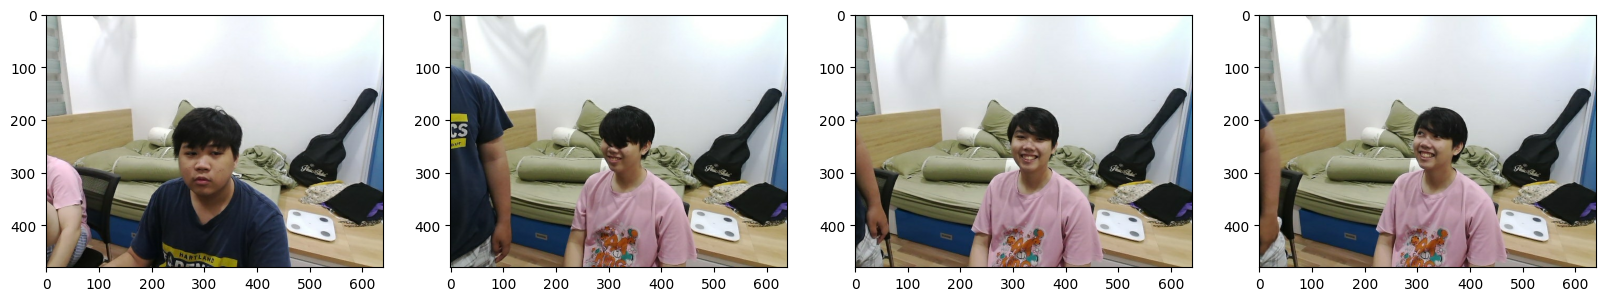

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_img):
    ax[idx].imshow(image)
plt.show()

#### Using split-folders to split the dataset images into train, val and test

In [30]:
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [31]:
import splitfolders

In [32]:
input_folder = ROOT_PATH + "data\\images\\"
output_folder = ROOT_PATH + "data\\images\\"
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.6,.2,.2), group_prefix=None)

Copying files: 181 files [00:00, 1141.78 files/s]


#### Split the labels folder into train, test, val based on corresponding image file

In [33]:
images_list_folder = ['train', 'val', 'test']
for image_folder in images_list_folder:
    for file in os.listdir(os.path.join(ROOT_PATH + 'data\\images\\', image_folder, 'face')):
        filename = file.split('.')[0] + '.xml'
        existing_filepath = os.path.join(ROOT_PATH, 'data', 'labels', 'face_labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join(ROOT_PATH, 'data', 'labels', image_folder, filename)
            os.replace(existing_filepath, new_filepath)

In [34]:
img = cv2.imread(os.path.join('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\data\\', 'images', 'train', 'face', '00c4e771-4fb4-11ed-aef6-086ac5699bea.jpg'))

In [35]:
img.shape

(480, 640, 3)

In [36]:
type(img)

numpy.ndarray

#### Using xmltodict to extract data from xml file

In [ ]:
%pip install xmltodict

In [37]:
import xmltodict

In [38]:
from pprint import pprint


with open (os.path.join(ROOT_PATH, 'data', 'labels', 'train', '2ee76b88-453c-11ed-acbd-086ac5699bea.xml'), 'r') as file:
    my_xml = file.read()

label = xmltodict.parse(my_xml)

pprint(label, indent = 2)

{ 'annotation': { 'filename': '2ee76b88-453c-11ed-acbd-086ac5699bea.jpg',
                  'folder': 'face',
                  'object': { 'bndbox': { 'xmax': '343',
                                          'xmin': '233',
                                          'ymax': '319',
                                          'ymin': '177'},
                              'difficult': '0',
                              'name': 'face',
                              'pose': 'Unspecified',
                              'truncated': '0'},
                  'path': 'D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\data\\images\\face\\2ee76b88-453c-11ed-acbd-086ac5699bea.jpg',
                  'segmented': '0',
                  'size': {'depth': '3', 'height': '480', 'width': '640'},
                  'source': {'database': 'Unknown'}}}


In [39]:
label['annotation']['object']['bndbox']

{'xmin': '233', 'ymin': '177', 'xmax': '343', 'ymax': '319'}

In [40]:
# extracting the bounding box from xml file
coords = [0, 0, 0, 0]
coords[0] = int(label['annotation']['object']['bndbox']['xmin'])
coords[1] = int(label['annotation']['object']['bndbox']['ymin'])
coords[2] = int(label['annotation']['object']['bndbox']['xmax'])
coords[3] = int(label['annotation']['object']['bndbox']['ymax'])

In [41]:
coords

[233, 177, 343, 319]

### Augmentation image using albumentations

In [42]:
coords = list(np.divide(coords, [640, 480, 640, 480]))

In [49]:
coords

[0.3640625, 0.36875, 0.5359375, 0.6645833333333333]

In [43]:
import albumentations as alb

In [50]:
augmentor = alb.Compose([
    alb.RandomCrop(width=450, height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomGamma(p=0.2),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
], bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [51]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [52]:
augmented

{'image': array([[[103, 134, 165],
         [101, 135, 165],
         [100, 134, 164],
         ...,
         [ 59, 102, 123],
         [ 69, 111, 134],
         [ 66, 107, 132]],
 
        [[105, 136, 167],
         [102, 136, 166],
         [101, 135, 165],
         ...,
         [ 71, 113, 136],
         [ 70, 111, 136],
         [ 68, 109, 134]],
 
        [[107, 138, 169],
         [106, 137, 168],
         [104, 135, 166],
         ...,
         [ 63, 107, 130],
         [ 68, 108, 133],
         [ 68, 108, 133]],
 
        ...,
 
        [[255, 255, 254],
         [254, 255, 253],
         [253, 254, 252],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 254],
         [255, 255, 254],
         [254, 255, 253],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 254],
         [255, 255, 254],
         [255, 255, 254],
         ...,
         [255, 255,

In [53]:
augmented['class_labels']

['face']

In [54]:
cv2.rectangle(
    augmented['image'],
    tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
    tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
    (250, 0, 0), 2
)

array([[[103, 134, 165],
        [101, 135, 165],
        [100, 134, 164],
        ...,
        [ 59, 102, 123],
        [ 69, 111, 134],
        [ 66, 107, 132]],

       [[105, 136, 167],
        [102, 136, 166],
        [101, 135, 165],
        ...,
        [ 71, 113, 136],
        [ 70, 111, 136],
        [ 68, 109, 134]],

       [[107, 138, 169],
        [106, 137, 168],
        [104, 135, 166],
        ...,
        [ 63, 107, 130],
        [ 68, 108, 133],
        [ 68, 108, 133]],

       ...,

       [[255, 255, 254],
        [254, 255, 253],
        [253, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [254, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

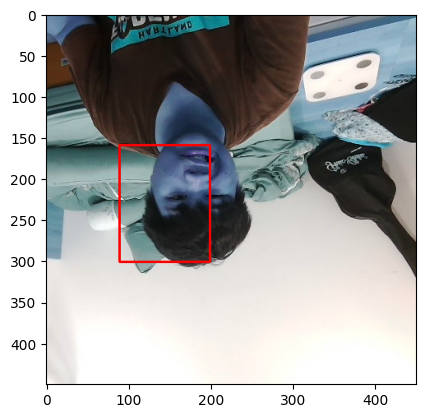

In [55]:
plt.imshow(augmented['image'])

#### Now we are going to augment all the images in the dataset

In [20]:
import json

In [57]:
# since augmented style 'albumentations' requires all coords must be between 0 and 1, so we need to check if there are any number exceeds 1 or below 0
def check_bbox(bbox):
    for i in range(4):
        if (bbox[i]<0):
            bbox[i]=0
        elif (bbox[i]>1):
            bbox[i]=1

    return tuple(bbox)

In [58]:
LABEL_PATH = ROOT_PATH + '\\labels';

In [63]:
for partition in ['train', 'val', 'test']:
    for image in os.listdir(os.path.join('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\data\\', 'images', partition, 'face')):
        print('folder: ' + partition + 'image: ' + image)
        img = cv2.imread(os.path.join(os.path.join('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\data\\', 'images', partition, 'face', image)))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\data\\', 'labels', partition, f'{image.split(".")[0]}.xml')
        if (os.path.exists(label_path)):
            with open(label_path, 'r') as file:
                my_xml = file.read()
                
            label = xmltodict.parse(my_xml)
            coords[0] = int(label['annotation']['object']['bndbox']['xmin'])
            coords[1] = int(label['annotation']['object']['bndbox']['ymin'])
            coords[2] = int(label['annotation']['object']['bndbox']['xmax'])
            coords[3] = int(label['annotation']['object']['bndbox']['ymax'])
            print('finish extract data: ' + label['annotation']['filename'])
            coords = list(np.divide(coords, [640, 480, 640, 480]))
        
        # Create new annotation file for each image
        try:
            for x in range(60):
                new_bbox = check_bbox(coords)
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0
                
                with open(os.path.join('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data\\', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as file:
                    json.dump(annotation, file)
        except Exception as e:
            print(e)


folder: trainimage: 0020b615-4fb4-11ed-85fe-086ac5699bea.jpg
finish extract data: 0020b615-4fb4-11ed-85fe-086ac5699bea.jpg
folder: trainimage: 00c4e771-4fb4-11ed-aef6-086ac5699bea.jpg
finish extract data: 00c4e771-4fb4-11ed-aef6-086ac5699bea.jpg
folder: trainimage: 011666a6-4fb4-11ed-8fc9-086ac5699bea.jpg
finish extract data: 011666a6-4fb4-11ed-8fc9-086ac5699bea.jpg
folder: trainimage: 01679a82-4fb4-11ed-8322-086ac5699bea.jpg
finish extract data: 01679a82-4fb4-11ed-8322-086ac5699bea.jpg
folder: trainimage: 01b9086c-4fb4-11ed-bdb5-086ac5699bea.jpg
finish extract data: 01b9086c-4fb4-11ed-bdb5-086ac5699bea.jpg
folder: trainimage: 03010600-4fb4-11ed-8ea6-086ac5699bea.jpg
finish extract data: 03010600-4fb4-11ed-8ea6-086ac5699bea.jpg
folder: trainimage: 1819f126-4fb4-11ed-82fa-086ac5699bea.jpg
finish extract data: 1819f126-4fb4-11ed-82fa-086ac5699bea.jpg
folder: trainimage: 1868de0c-4fb4-11ed-805e-086ac5699bea.jpg
finish extract data: 1868de0c-4fb4-11ed-805e-086ac5699bea.jpg
folder: trainima

#### Put the new dataset into each variable

In [10]:
train_images = tf.data.Dataset.list_files('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x : tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x : x / 255)

In [11]:
test_images = tf.data.Dataset.list_files('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x : tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x : x / 255)

In [12]:
val_images = tf.data.Dataset.list_files('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x : tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x : x / 255)

In [13]:
train_images.as_numpy_iterator().next()

array([[[0.5314951 , 0.4952206 , 0.45159313],
        [0.53088236, 0.5151961 , 0.47058824],
        [0.5360294 , 0.51593137, 0.47916666],
        ...,
        [0.0245098 , 0.03088235, 0.01127451],
        [0.01660539, 0.02297794, 0.00465686],
        [0.00900735, 0.01084559, 0.00514706]],

       [[0.5002451 , 0.4502451 , 0.38161764],
        [0.5188113 , 0.4815564 , 0.42224264],
        [0.5352941 , 0.4872549 , 0.43970588],
        ...,
        [0.01678922, 0.02071078, 0.00128676],
        [0.03259804, 0.03651961, 0.01715686],
        [0.16666667, 0.1716299 , 0.16697304]],

       [[0.45900735, 0.3545956 , 0.23890932],
        [0.45398283, 0.35496324, 0.25055146],
        [0.44166666, 0.35692403, 0.26905638],
        ...,
        [0.01813726, 0.0216299 , 0.0060049 ],
        [0.08308823, 0.09050245, 0.08560049],
        [0.32971814, 0.3432598 , 0.35894608]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [21]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as file:
        label = json.load(file)
    return [label['class']], label['bbox']

In [22]:
train_labels = tf.data.Dataset.list_files('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x : tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [23]:
test_labels = tf.data.Dataset.list_files('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x : tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [24]:
val_labels = tf.data.Dataset.list_files('D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x : tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [25]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4133, 0.3467, 0.6357, 0.6157], dtype=float16))

In [26]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(6420, 6420, 2220, 2220, 2160, 2160)

In [27]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [28]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(5000)
test = test.batch(8)
test = test.prefetch(4)

In [29]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(5000)
val = val.batch(8)
val = val.prefetch(4)

In [30]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3977, 0.24  , 0.702 , 0.6377],
        [0.331 , 0.3577, 0.569 , 0.6333],
        [0.3022, 0.3977, 0.6045, 0.8154],
        [0.3667, 0.32  , 0.5864, 0.6064],
        [0.4912, 0.3623, 0.7847, 0.738 ],
        [0.3955, 0.2778, 0.691 , 0.6733],
        [0.3645, 0.2356, 0.682 , 0.64  ],
        [0.331 , 0.2156, 0.642 , 0.6333]], dtype=float16))

In [31]:
data_samples = train.as_numpy_iterator()

In [32]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


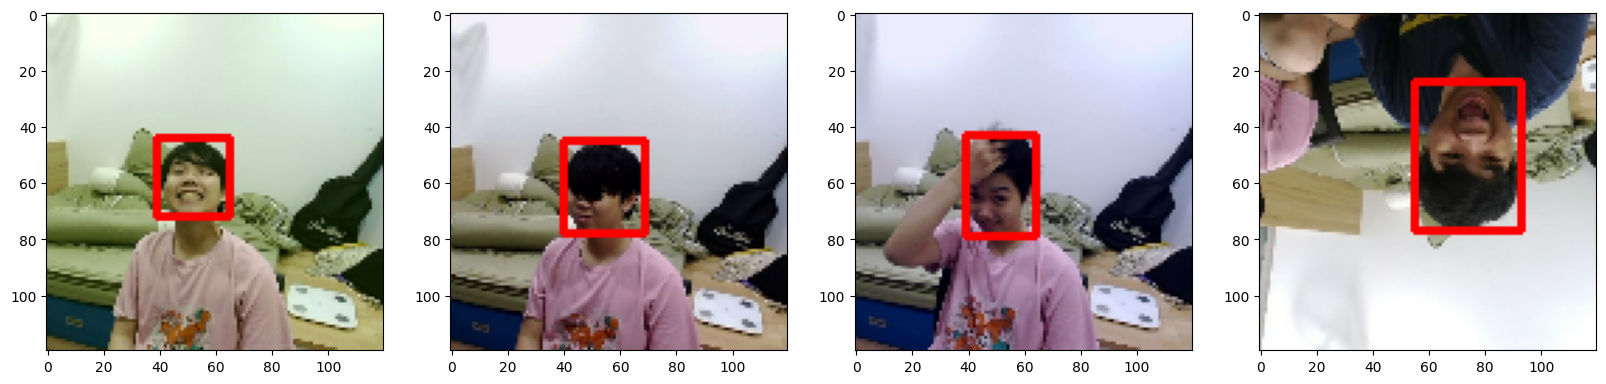

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

### Train models

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [35]:
vgg = VGG16(include_top=False)

In [36]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [37]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [38]:
facetracker = build_model()

In [39]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [40]:
X, y = train.as_numpy_iterator().next()

In [41]:
X.shape

(8, 120, 120, 3)

In [42]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 6s 6s/step


In [43]:
classes, coords

(array([[0.5655532 ],
        [0.48682907],
        [0.4946819 ],
        [0.40784207],
        [0.52473134],
        [0.5391097 ],
        [0.5246625 ],
        [0.42007202]], dtype=float32),
 array([[0.41333368, 0.53429043, 0.6909689 , 0.684404  ],
        [0.3941237 , 0.5516338 , 0.7114545 , 0.62525386],
        [0.37474078, 0.52247447, 0.70035446, 0.6465255 ],
        [0.49006584, 0.55508757, 0.7489354 , 0.64802396],
        [0.4373042 , 0.39442512, 0.7664449 , 0.59671444],
        [0.36167845, 0.48010886, 0.73430693, 0.67777324],
        [0.4155393 , 0.45268276, 0.7577657 , 0.6520944 ],
        [0.507379  , 0.5232983 , 0.78548884, 0.640325  ]], dtype=float32))

In [44]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [45]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [46]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [47]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [48]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.80471754>

In [49]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7081927>

In [50]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.80471754>

In [51]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [52]:
model = FaceTracker(facetracker)

In [53]:
model.compile(opt, classloss, regressloss)

In [101]:
logdir='logs'

In [102]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [103]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
803/803 [==============================] - 126s 138ms/step - total_loss: 0.0218 - class_loss: 0.0034 - regress_loss: 0.0201 - val_total_loss: 0.0049 - val_class_loss: 5.9456e-06 - val_regress_loss: 0.0049
Epoch 2/10
803/803 [==============================] - 95s 110ms/step - total_loss: 0.0026 - class_loss: 2.0495e-06 - regress_loss: 0.0026 - val_total_loss: 0.0022 - val_class_loss: 1.2219e-06 - val_regress_loss: 0.0022
Epoch 3/10
803/803 [==============================] - 103s 119ms/step - total_loss: 0.0018 - class_loss: 6.5571e-07 - regress_loss: 0.0018 - val_total_loss: 0.0015 - val_class_loss: 6.1095e-07 - val_regress_loss: 0.0015
Epoch 4/10
803/803 [==============================] - 114s 127ms/step - total_loss: 0.0013 - class_loss: 2.8981e-07 - regress_loss: 0.0013 - val_total_loss: 0.0047 - val_class_loss: 4.4704e-07 - val_regress_loss: 0.0047
Epoch 5/10
803/803 [==============================] - 109s 121ms/step - total_loss: 0.0012 - class_loss: 1.8369e-07 - regress

In [104]:
hist.history

{'total_loss': [0.0021686560939997435,
  0.0005252138362266123,
  0.0008768802508711815,
  0.0006890420918352902,
  0.0007625095313414931,
  0.0004351898096501827,
  0.0004031640710309148,
  0.0006602595094591379,
  0.0004573713813442737,
  0.0003415766404941678],
 'class_loss': [3.546487505445839e-06,
  4.470349495022674e-07,
  7.450584575963148e-07,
  8.940698137394065e-08,
  3.874303331485862e-07,
  1.1920931797249068e-07,
  -0.0,
  -0.0,
  5.960465188081798e-08,
  2.980232594040899e-08],
 'regress_loss': [0.0021668828558176756,
  0.0005249903188087046,
  0.0008765077218413353,
  0.0006889973883517087,
  0.0007623158162459731,
  0.00043513020500540733,
  0.0004031640710309148,
  0.0006602595094591379,
  0.000457341579021886,
  0.00034156173933297396],
 'val_total_loss': [0.004880196414887905,
  0.002168313367292285,
  0.0015411321073770523,
  0.004710391629487276,
  0.002110542729496956,
  0.004629005677998066,
  0.002920996630564332,
  0.001933197840116918,
  0.002399533288553357,


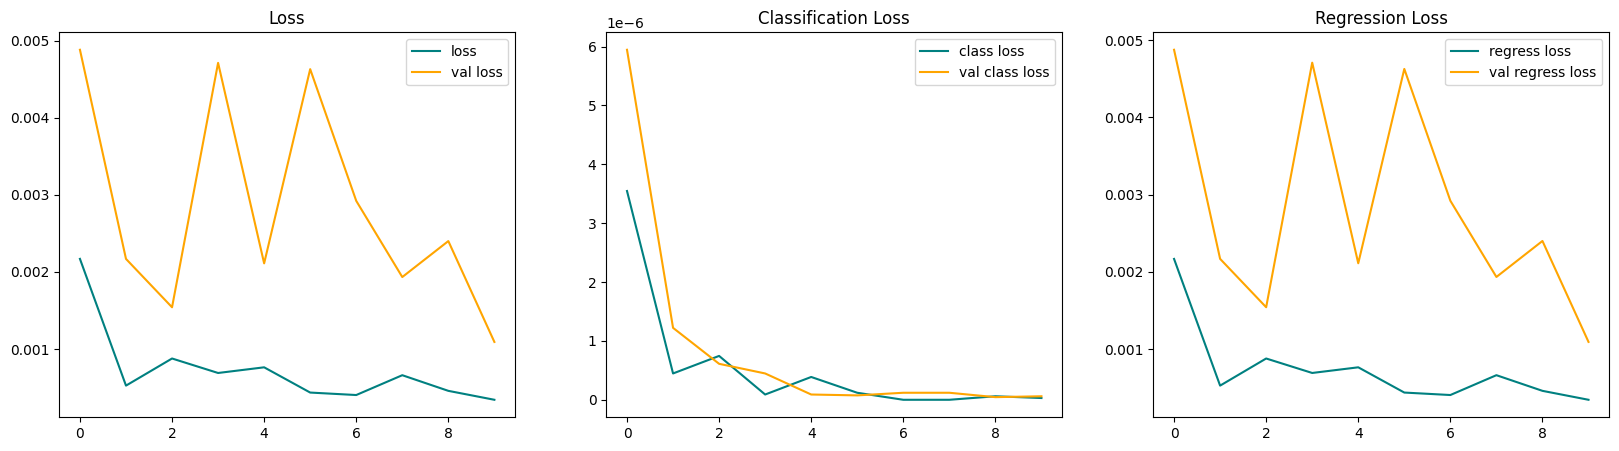

In [105]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [106]:
test_data = test.as_numpy_iterator()

In [107]:
test_sample = test_data.next()

In [2]:
yhat = facetracker.predict(test_sample[0])

NameError: name 'facetracker' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


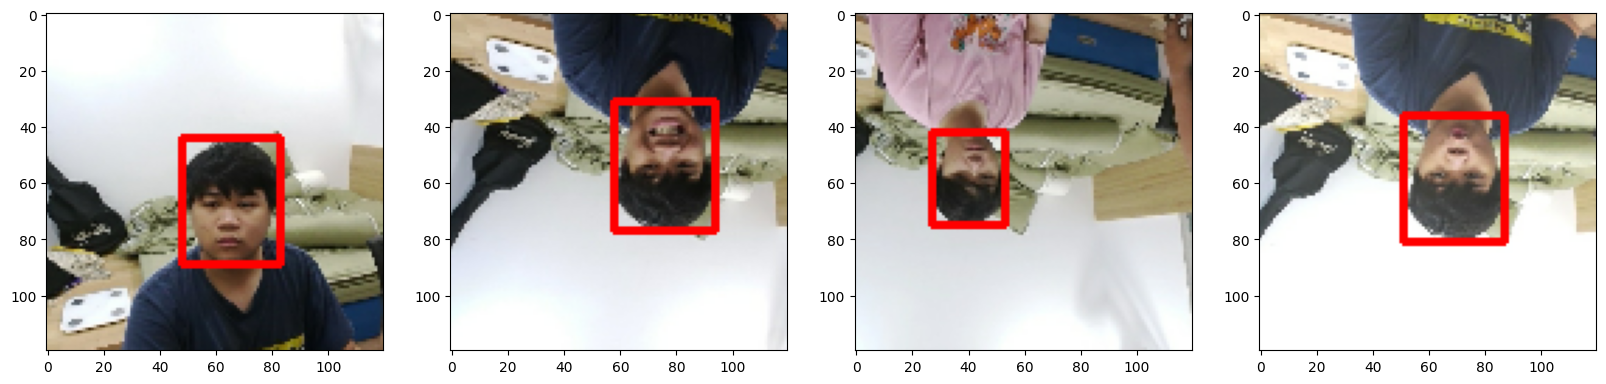

In [109]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### Package the model into h5 file and test

In [2]:
from tensorflow.keras.models import load_model

In [1]:
model.compile(opt, classloss, regressloss)

NameError: name 'model' is not defined

In [54]:
facetracker.save('facetracker.h5')

In [7]:
import cv2
import tensorflow as tf

In [3]:
facetracker = load_model('facetracker.h5')

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable